Aim : To use this dataset to categorise plaeyrs by country to be able to predict how good a country can be in the international matches \
Objective : Managers, Gamers will be able to know the best player for eac position on the game field or on game console

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from scipy.stats import f_oneway, ttest_ind, pearsonr 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# read csv file with pandas
data = pd.read_csv('fifa.csv', low_memory=False)

In [26]:
# call first 5 rows
data.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


In [27]:
# shape of dataset
data.shape

(17981, 39)

In [28]:
# check info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Acceleration         17981 non-null  object
 5   Aggression           17981 non-null  object
 6   Agility              17981 non-null  object
 7   Balance              17981 non-null  object
 8   Ball control         17981 non-null  object
 9   Composure            17981 non-null  object
 10  Crossing             17981 non-null  object
 11  Curve                17981 non-null  object
 12  Dribbling            17981 non-null  object
 13  Finishing            17981 non-null  object
 14  Free kick accuracy   17981 non-null  object
 15  GK diving            17981 non-null  object
 16  GK h

In [29]:
# check for missing value
data.isnull().sum().sum()

0

In [4]:
# change all column names to lower case for typing ease
data.columns = data.columns.str.lower()

In [31]:
# check the data types and total data type counts 
data.dtypes.value_counts()

object    37
int64      2
dtype: int64

In [5]:
# change some columns dtype to int dtype
cols_num = (data.dtypes == 'O').index
cols_num = cols_num.drop(['name','preferred positions','nationality', 'overall','age']).tolist()

In [6]:
# total all un-summed data
for col in cols_num:
    data[col] = data[col].apply(lambda x : eval(x))

In [7]:
# remove all extra spaces in the object type columns
data[['name','preferred positions','nationality']] = data[['name','preferred positions','nationality']].applymap(str.strip)

In [8]:
# transform all latin, german, norwagian, etc. letters to english letters
data.name = data.name.apply(unidecode)

In [9]:
# main positions
positions = 'GK CB LB RB CM RM LM RW LW ST'.split(' ')

In [10]:
# get all playing postions of the player
data['num of position'] = data['preferred positions'].apply(lambda x: len(x.split()))

# set the first postion as the most preferres position 
data['main position'] = data['preferred positions'].apply(lambda x: x if x in positions and x.split()[0].strip() else x if x in positions else x.split()[0].strip())

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17981.0,25.144541,4.614272,16.0,21.0,25.0,28.0,47.0
overall,17981.0,66.247984,6.987965,46.0,62.0,66.0,71.0,94.0
acceleration,17981.0,103.362327,984.877556,11.0,56.0,67.0,75.0,33270.0
aggression,17981.0,77.572938,767.663944,11.0,43.0,59.0,69.0,43130.0
agility,17981.0,98.081475,909.695941,14.0,55.0,65.0,74.0,30164.0
balance,17981.0,86.581225,751.287441,11.0,56.0,66.0,74.0,31472.0
ball control,17981.0,121.133530,1232.914608,8.0,53.0,63.0,69.0,43145.0
composure,17981.0,103.637506,1026.429722,5.0,51.0,60.0,67.0,27150.0
crossing,17981.0,86.470107,910.701596,5.0,38.0,54.0,64.0,27150.0
curve,17981.0,62.597631,622.736138,6.0,34.0,49.0,62.0,43131.0


There are many outliers in most column of which the maximum score is supposed to be 100

In [11]:
# replace all outliers in the dataset with the median of players postion's category  
data_cleaned = data.copy()
for col in cols_num:
    data_cleaned[col] = data.groupby('main position')[col].transform(lambda x: x.median() if (x > 100).any() else x).astype('int')

In [12]:
all_positions = data_cleaned['preferred positions'].str.get_dummies(' ').columns.tolist()
all_positions

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST']

In [13]:
forward = ['ST', 'LW', 'RW', 'CF']
midfield = 'CDM CAM LM RM CM'.split()
defence = 'CB RWB LWB LB RB'.split()

In [14]:
data_cleaned['FMD'] = data_cleaned['main position'].apply(lambda x: 'fwd' if x in forward else 'def' if x in defence else 'mid' if x in midfield else 'gk')

In [15]:
data_cleaned['FMD'].value_counts()

mid    7174
def    5440
fwd    3338
gk     2029
Name: FMD, dtype: int64

<AxesSubplot:xlabel='FMD', ylabel='count'>

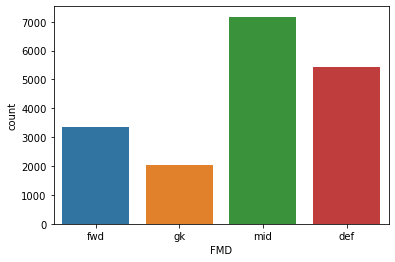

In [24]:
sns.countplot(data_cleaned['FMD'])

In [20]:
# rank goal kepeper in the world according to their overall ranking
gk_data = data_cleaned.loc[data_cleaned['preferred positions'] == 'GK'].sort_values('overall',ascending = False)
gk_data = gk_data.loc[:,['name','nationality','overall']].reset_index(drop = True)
gk_data.head()

,name,nationality,overall
0,M. Neuer,Germany,92
1,De Gea,Spain,90
2,T. Courtois,Belgium,89
3,G. Buffon,Italy,89
4,J. Oblak,Slovenia,88


In [21]:
data_cleaned['crossing'].min()

5

In [23]:
#best players for each feature and their score
best_player_feature = pd.concat([data_cleaned.set_index(['name'])[cols_num].idxmax(),data_cleaned[cols_num].max(0)],axis = 1).reset_index()
best_player_feature.columns = ['feature','name','score']
best_player_feature

,feature,name,score
0,acceleration,Lucas,95
1,aggression,S. Dubarbier,90
2,agility,Neymar,96
3,balance,Bernard,96
4,ball control,L. Messi,95
5,composure,Neymar,92
6,crossing,K. Walker,65
7,curve,M. Reus,90
8,dribbling,A. Masuaku,80
9,finishing,Neymar,89


In [27]:
# best player for each player position with their correspponding overall score and nationality
data_cleaned.groupby(['main position'])[['overall','name','nationality']].first()

,overall,name,nationality
main position,,,
CAM,86,Coutinho,Brazil
CB,90,Sergio Ramos,Spain
CDM,90,T. Kroos,Germany
CF,83,S. Kagawa,Japan
CM,87,N. Kante,France
GK,92,M. Neuer,Germany
LB,87,Marcelo,Brazil
LM,87,C. Eriksen,Denmark
LW,92,Neymar,Brazil


In [62]:
# low ranked player for each player position with their correspponding overall score and nationality
data_cleaned.groupby('main position')['overall','name','nationality'].last()

,overall,name,nationality
main position,,,
CAM,47,L. Kiely,Republic of Ireland
CB,46,J. Keeble,England
CDM,49,C. Gnerlich,Germany
CF,51,D. Evangelista,Italy
CM,46,J. Lundstram,England
GK,46,B. Richardson,England
LB,48,E. Hughes,Northern Ireland
LM,48,T. Robinson,England
LW,51,E. Hodge,England


In [61]:
# average of each country's player overall score sorted by size(number of players) and mean of overall score
country_avg_score = data_cleaned.groupby('nationality')['overall'].agg(['size','sum','mean']).sort_values( by = ['sum','mean'], ascending = [False, False]).reset_index()
country_avg_score.head()

,nationality,size,sum,mean
0,England,1630,102804,63.069939
1,Germany,1140,75127,65.900877
2,Spain,1019,71268,69.939156
3,France,978,65806,67.286299
4,Argentina,965,65394,67.765803


In [63]:
#positions having the highest number of players
data_cleaned['main position'].value_counts().to_frame()

,main position
CB,2705
ST,2277
GK,2029
CM,1977
CDM,1396
RM,1350
LM,1326
LB,1309
RB,1195
CAM,1125


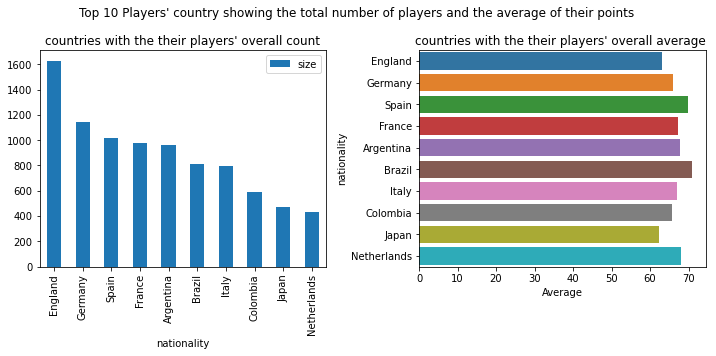

In [31]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
axes = axes.flatten()
country_avg_score[:10].plot.bar(x = 'nationality', y = 'size', ax= axes[0])

sns.barplot( data = country_avg_score[:10],  x = 'mean', y= 'nationality', ax = axes[1])
axes[1].set_title('countries with the their players\' overall average ')
axes[0].set_title('countries with the their players\' overall count')
plt.xlabel('Average')
plt.suptitle('Top 10 Players\' country showing the total number of players and the average of their points' )
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='FMD', ylabel='Count'>

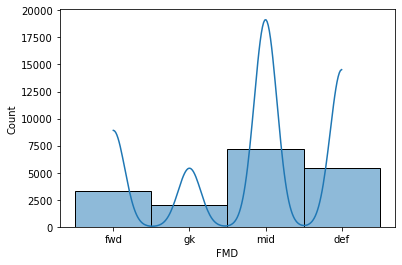

In [69]:
sns.histplot(data_cleaned['FMD'],kde= True) # distribution of players' playing postions - forward, midfield, defence and goal keeping

The plot above shows that that the players' playing postion is  not normal

<AxesSubplot:xlabel='overall', ylabel='Count'>

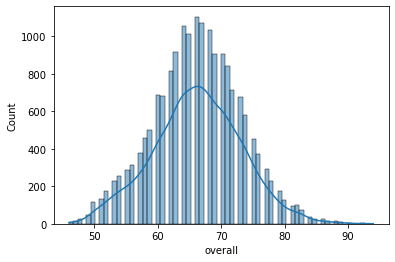

In [54]:
sns.histplot(data_cleaned['overall'],kde= True) # distribution of overall ranking of the players

In [64]:
# oldest player(s) and youngest player(s)
data_cleaned[(data_cleaned['age'] == data_cleaned['age'].max()) | (data_cleaned['age'] == data_cleaned['age'].min())]

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position,FMD
10556,K. Pierie,16,Netherlands,65,71,64,67,68,62,60,...,72,72,66,67,51,37,LB CB,2,LB,def
11397,A. Gomes,16,England,64,66,63,67,69,66,62,...,66,71,60,65,63,47,CM RW LW CAM,4,CM,mid
13733,E. Vignato,16,Italy,61,71,13,72,73,68,63,...,70,59,42,60,65,55,CAM,1,CAM,mid
15063,G. McEachran,16,England,59,66,63,67,69,66,62,...,66,71,60,65,63,47,CM CAM,2,CM,mid
15119,L. Geertruida,16,Netherlands,59,71,66,66,66,61,31,...,71,71,66,68,49,36,RB CB,2,RB,def
15571,Javi Vazquez,16,Spain,58,59,68,54,56,54,60,...,61,65,68,76,40,29,CB,1,CB,def
15837,J. Romero,16,Argentina,58,70,53,67,65,65,61,...,71,65,24,71,55,59,ST,1,ST,fwd
15968,E. Haland,16,Norway,58,70,53,67,65,65,61,...,71,65,24,71,55,59,ST,1,ST,fwd
16116,M. Sprang,16,Germany,57,40,12,38,43,20,18,...,41,31,14,62,35,12,GK,1,GK,gk
17014,R. Strechie,16,Romania,54,66,63,67,69,66,62,...,66,71,60,65,63,47,CM,1,CM,mid


In [180]:
corr_ = data_cleaned[cols_num].corr()

In [190]:
mask = np.tril(np.ones_like(corr_))

<AxesSubplot:>

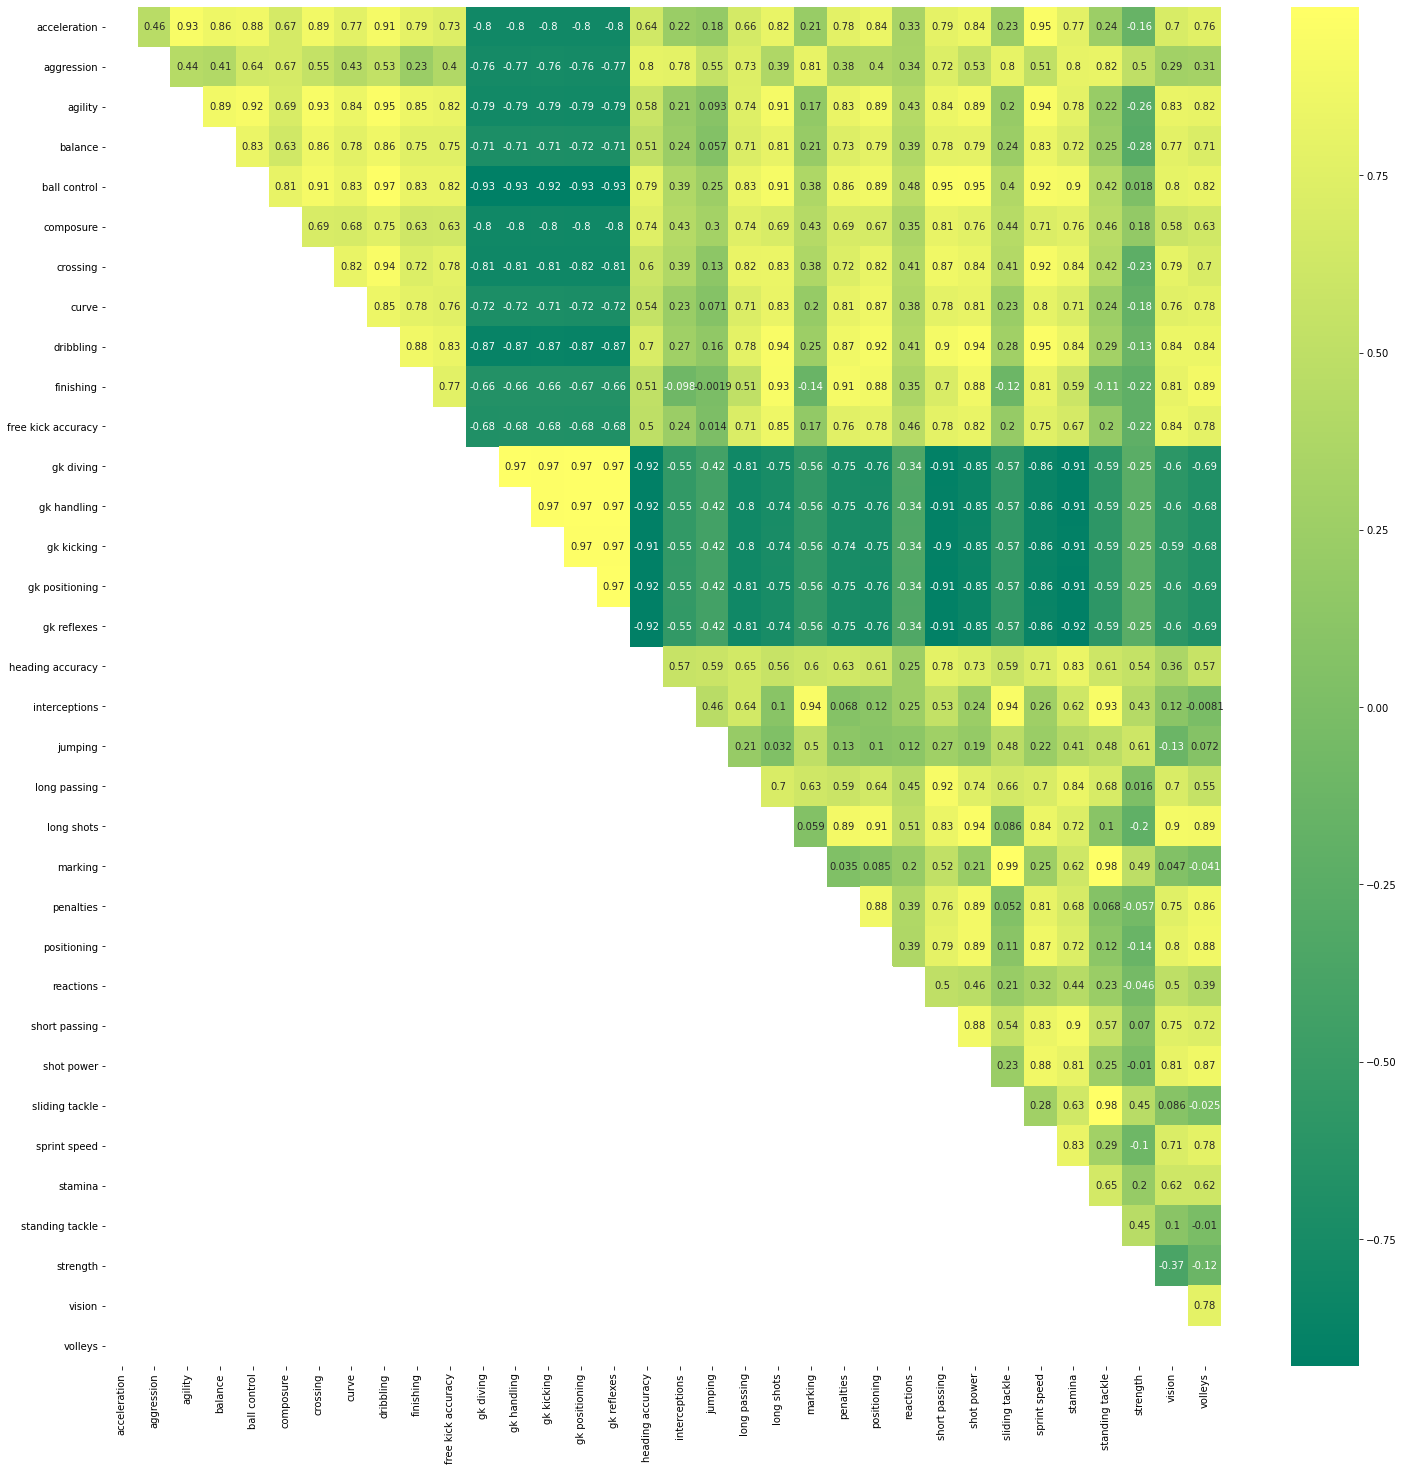

In [191]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_, annot=True, mask = mask, cmap='summer')

In [184]:
#check for correlation betwwn agility and sprint speed
data_cleaned['agility'].corr(data_cleaned['sprint speed'])

0.9398881845364163

### Overview of Nigerian Players

In [46]:
# All Nigerian players according to their overall ranking
nga_players = data_cleaned[(data_cleaned['nationality'] == 'Nigeria')].sort_values(by = 'overall', ascending = False).reset_index(drop = True)
nga_players.head()

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position,FMD
0,V. Enyeama,34,Nigeria,80,40,39,38,43,20,24,...,41,31,12,62,35,11,GK,1,GK,gk
1,V. Moses,26,Nigeria,79,75,54,75,73,67,61,...,75,68,40,60,61,53,LM RM RWB,3,LM,mid
2,O. Ndidi,20,Nigeria,77,66,63,67,69,66,62,...,66,71,60,65,63,47,CM CDM,2,CM,mid
3,A. Musa,24,Nigeria,76,75,54,75,73,67,61,...,75,68,40,60,61,53,LM ST,2,LM,mid
4,L. Balogun,29,Nigeria,75,71,66,66,52,61,72,...,71,71,66,68,49,36,RB CB,2,RB,def


Text(0.5, 0, "Number of Players' position")

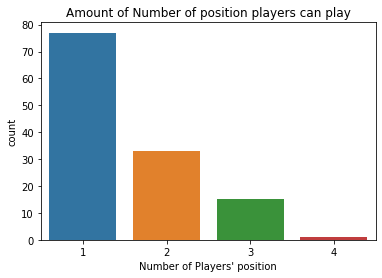

In [47]:
sns.countplot(data = nga_players, x= 'num of position')
plt.title('Amount of Number of position players can play')
plt.xlabel('Number of Players\' position')

Text(0.5, 1.0, 'Age distribution of Nigerian players')

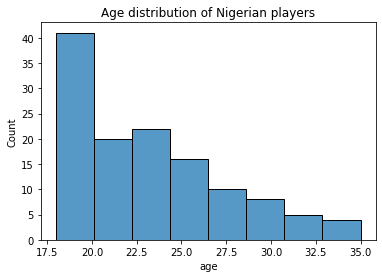

In [34]:
sns.histplot( data = nga_players, x= 'age')
plt.title('Age distribution of Nigerian players')

The graph above shows that most of the Nigerian players are very young

In [37]:
nga_players['FMD'].value_counts()

fwd    49
mid    48
def    26
gk      3
Name: FMD, dtype: int64

<AxesSubplot:xlabel='FMD', ylabel='Count'>

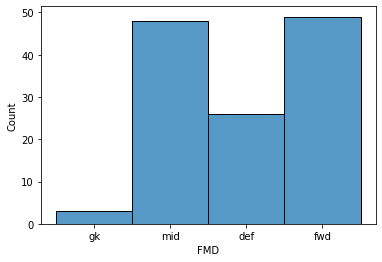

In [38]:
sns.histplot(nga_players['FMD'])

The above figure shows that Nigeria has more offensive players when compared to the defence  

Text(0.5, 1.0, 'Distribution of overall score of Nigerian players')

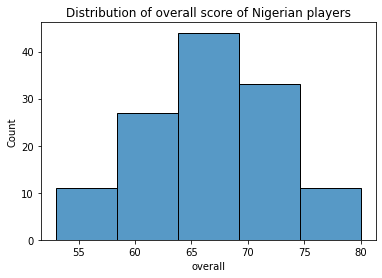

In [39]:
sns.histplot(data = nga_players, x = 'overall', bins = 5)
plt.title('Distribution of overall score of Nigerian players')

The average overall score of Nigerian players on the fifa ranking ranges from 64 to 69 

In [40]:
#Median overall score
nga_players['overall'].median()

67.0

In [41]:
#Average overall score
nga_avg_overall_score = nga_players['overall'].mean()
nga_avg_overall_score

66.76190476190476

The mean is 66.76 while the median is 67. This shows the data is evenly distributed

In [42]:
world_avg_overall_score = data_cleaned['overall'].mean()
world_avg_overall_score

66.24798398309326

<BarContainer object of 2 artists>

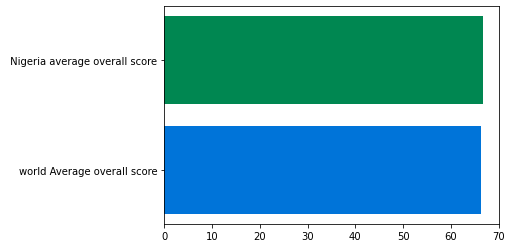

In [43]:
plt.barh(['world Average overall score', ' Nigeria average overall score'],[world_avg_overall_score,nga_avg_overall_score], color = ['#0074D9','#008751'])

In [44]:
#best players for each feature and their score
players_feat_NGA = pd.concat([nga_players.set_index(['name'])[cols_num].idxmax(),nga_players[cols_num].max(0)],axis = 1).reset_index()
players_feat_NGA.columns = ['feature','name','score']
players_feat_NGA

,feature,name,score
0,acceleration,K. Fatai,86
1,aggression,E. Echiejile,80
2,agility,E. Dennis,81
3,balance,I. Uzochukwu,86
4,ball control,C. Ezeh,78
5,composure,L. Balogun,72
6,crossing,E. Echiejile,64
7,curve,O. Onazi,75
8,dribbling,E. Dennis,70
9,finishing,E. Dennis,71


In [45]:
#best players for each feature and their score
players_best_feat_NGA = pd.concat([nga_players.set_index(['name'])[cols_num].idxmin(),nga_players[cols_num].min(0)],axis = 1).reset_index()
players_best_feat_NGA.columns = ['feature','name','score']
players_best_feat_NGA

,feature,name,score
0,acceleration,V. Enyeama,40
1,aggression,D. Alampasu,17
2,agility,V. Enyeama,38
3,balance,V. Enyeama,43
4,ball control,V. Enyeama,20
5,composure,V. Enyeama,24
6,crossing,V. Enyeama,10
7,curve,C. Ikeme,12
8,dribbling,D. Alampasu,9
9,finishing,D. Alampasu,9


In [46]:
nga_players.groupby('FMD').mean().T

FMD,def,fwd,gk,mid
age,22.653846,23.857143,28.333333,23.083333
overall,65.807692,66.204082,70.000000,67.645833
acceleration,64.115385,71.306122,40.000000,71.395833
aggression,67.384615,51.693878,30.666667,58.541667
agility,59.384615,67.734694,38.000000,71.375000
balance,60.038462,65.326531,43.000000,71.250000
ball control,57.307692,65.734694,20.000000,66.791667
composure,58.653846,60.897959,27.666667,61.833333
crossing,47.923077,48.755102,12.000000,59.875000
curve,38.615385,51.591837,13.333333,56.145833


Recommendations:
Nigeria needs to have
- more defensive players and Goalkeepers
- Goal keepers need to improve on :
    - Long passes 
    - Long shots
- Midfielders need to improve on:
    - Crossing
    - Vision
    - Marking
- Forward need to improve on:
    - Crossing
    - Vollleying
    - Aggression
- Defence need to improve on:
    - Experienced defenders

General :
- Players from Nigeria need to improve as the average of their overall score is less than 1


#####  Getting dummies of nationality and playing positions

In [67]:
data_scores = data.drop(['main position', 'preferred positions','nationality','name'], axis = 1)
country_data = data['nationality'].str.get_dummies()
country_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# get dummies for all playing postions in dataframe
data_pos = data['preferred positions'].str.get_dummies(sep = ' ')
data_pos.head()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Data Modeling

In [71]:
# concatenate all numeric dtype columns for model
data_4_model = pd.concat([data_scores,country_data,data_pos],axis = 1)
data_4_model.head()

,age,overall,acceleration,aggression,agility,balance,ball control,composure,crossing,curve,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,32,94,89,63,89,63,93,95,85,81,...,0,0,0,1,0,0,0,0,0,1
1,30,93,92,48,90,95,95,96,77,89,...,0,0,0,0,0,0,0,1,0,0
2,25,92,94,56,96,82,95,92,75,81,...,0,0,0,1,0,0,0,0,0,0
3,30,92,88,78,86,60,91,83,77,86,...,0,0,0,0,0,0,0,0,0,1
4,31,92,58,29,52,35,48,70,15,14,...,1,0,0,0,0,0,0,0,0,0


In [72]:
ss = StandardScaler() # standardaization of the model dataset
ss_country = ss.fit_transform(country_data)

In [65]:
X = data_4_model.drop(['overall'], axis = 1)
y =  data_4_model['overall']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.3, shuffle= True)

In [66]:
rfr = RandomForestRegressor(random_state=12, bootstrap=False)

In [67]:
rfr.fit(train_X, train_y)

RandomForestRegressor(bootstrap=False, random_state=12)

In [68]:
rfr.score(train_X, train_y)

1.0

In [69]:
rfr.score(test_X, test_y)

0.9011780619422919

In [70]:
y_pred = rfr.predict(test_X)

In [71]:
pd.concat([pd.Series(test_y,name= 'true y').reset_index(drop =True),pd.Series(y_pred.round(), name="Predicted y")],axis = 1).astype(int).sample(10)

,true y,Predicted y
1346,71,73
1692,55,57
830,61,63
1139,59,59
5029,73,73
102,61,64
3814,71,72
1081,71,70
4126,61,62
3933,74,71


<AxesSubplot:xlabel='overall', ylabel='Density'>

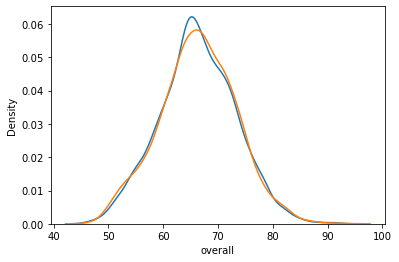

In [72]:
# plot of predicted overall score vs true overall score
sns.distplot(y_pred,hist = False)
sns.distplot(test_y,hist = False)

In [73]:
feature_importance = pd.DataFrame(zip(test_X.columns,rfr.feature_importances_)).rename(columns = {0:'feature',1:'importance'})
feature_importance = feature_importance.sort_values(by ='importance',ascending=False).reset_index(drop = True)

In [74]:
feature_importance.head()

,feature,importance
0,reactions,0.646302
1,ball control,0.088977
2,standing tackle,0.044775
3,marking,0.028821
4,gk positioning,0.024415


Text(0.5, 1.0, 'Top 20 feature importances of model')

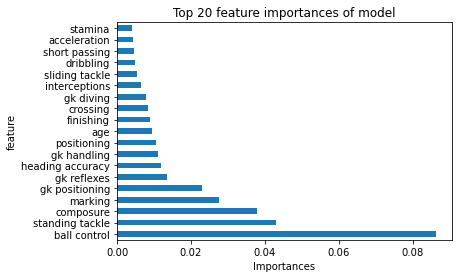

In [62]:
ax = feature_importance.iloc[1:20,:].plot.barh(x ='feature', y= 'importance', legend = False)
ax.set_xlabel('Importances')
ax.set_title('Top 20 feature importances of model')

The model predicts the following as the main factor that affects players overall ranking:
- Reaction 
- Ball control
- Standing tackle
- composure 
- marking

### Hypothesis Testing

H<i><sub>0</sub> : The number of positions of a player does not add to their overall performance</i>  <br>
H<i><sub>1</sub> : The number of positions of a player adds to their overall performance</i> 

In [50]:
one_position = data_cleaned.loc[data_cleaned['num of position'] == 1, 'overall']
two_positions = data_cleaned.loc[data_cleaned['num of position'] == 2, 'overall']
three_positions = data_cleaned.loc[data_cleaned['num of position'] == 3, 'overall']
four_positions = data_cleaned.loc[data_cleaned['num of position'] >= 4, 'overall']

In [122]:
alpha_value = 0.05
static, p_value = f_oneway(one_position,two_positions, three_positions, four_positions) # using one way ANOVA test
p_value
if p_value < alpha_value:
    print(f'Null hypothesis rejected, The number of positions of a player contributes to player\'s overall performance')
else:
    print(f'Failed to reject null hypotheis, The number of positions of a player has no contribution to player\'s overall performance')

Null hypothesis rejected, The number of positions of a player contributes to player's overall performance


In [76]:
#correlation analysis
# age of players play significant role in the overall ranking 

H0 : there is no relationship etween the age of players and the overall ranking\
H1 : the age of players has an effect on the overall ranking of the players

In [121]:
static, p_value = pearsonr(data_cleaned['age'], data_cleaned['overall'])
alpha_value = 0.05
if p_value < alpha_value :
    print('Reject Null hypothesis, Age has significance on the overall ranking of players')  
else:
    print('Failed to reject null hypothesis, Age has no significance correlation on the overall ranking of players')

Reject Null hypothesis, Age has significance on the overall ranking of players


In [67]:
pd.crosstab(data['overall'],data['num of position'], margins = True).reset_index()

num of position,overall,1,2,3,4,All
0,46,7,1,0,0,8
1,47,11,3,1,1,16
2,48,20,3,0,0,23
3,49,39,10,0,0,49
4,50,90,20,5,0,115
5,51,105,23,3,0,131
6,52,143,23,6,2,174
7,53,192,29,5,1,227
8,54,195,49,9,2,255
9,55,215,65,7,1,288
